In [ ]:
import utility

utility.lj_potential(0.5,10)

In [ ]:
utility.pbc(43,10)

In [ ]:
import init
#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

In [ ]:
positions = init.init_system(box_length, Npart)


In [ ]:
positions
import random
import numpy as np


In [ ]:
idx = random.randint(0,Npart-1)
idx

In [ ]:
prev_position = np.copy(positions[idx])
prev_position

In [ ]:
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo1

In [ ]:
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
Wo = Wo1 * Wo2
print(Wo)

In [ ]:
positions[idx][0] = np.random.rand(3)* box_length
positions[idx][0]

In [ ]:
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wn1

In [ ]:
#select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))

    Wn2_sum = sum(Wn2)

    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
    
    return 


In [ ]:
import init
import utility
import visualize
import random
import numpy as np

#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

positions = init.init_system(box_length, Npart)

def check(positions):
    for pos in positions:
        if np.linalg.norm(pos[0] - pos[1]) > bond_length + 0.01:
            return False
    
    return True

def get_minimum_distance(positions, idx1, idx2):
    min_len = 1000
    for i in range(len(positions)):
        if idx1 !=i:
            for pos in positions[i]:
                min_len = min(min_len, utility.pbc(np.linalg.norm(pos - positions[idx1][idx2]),box_length))
    
    return min_len

def CBMC_step(positions, Npart):
    #select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    # print("Wo2" ,Wo2)
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
        # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
            # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

    Wn2_sum = sum(Wn2)
    # print(Wn2_sum)
    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    # print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    # print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
            print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
            if get_minimum_distance(positions,idx,1) < 1:
                print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
                # print(Wn2)
                
                # return True
    
    return False

total_energy_sum = 0

for i in range(100):
    # visualize.visualize(positions)
    energy = utility.total_energy(positions,box_length)
    # print(energy)
    total_energy_sum += energy
    if CBMC_step(positions,Npart) == True:
        break


print(f"avg_energy {total_energy_sum / 100}")
print(f"Acceptance percentage {accepted_steps/1}")
visualize.visualize(positions)


In [ ]:
a = [5,3,2,1,4]
b = sum(a)
b
a[1]

In [ ]:

global accepted_steps
idx = random.randint(0,Npart-1)
#find rosenbluth factor for previous configuration
prev_position = np.copy(positions[idx])
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
# print("Wo2" ,Wo2)
Wo = Wo1 * Wo2
#find rosenbluth factor for new configuration
#choose a random postion for first atom
positions[idx][0] = np.random.rand(3)* box_length
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
second_atom_pos = []
Wn2 = []
for i in range(k):
    r = utility.generate_random_unit_vector()* bond_length
    positions[idx][1] = positions[idx][0] + r
    second_atom_pos.append(positions[idx][1])
    Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
    # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
        # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

Wn2_sum = sum(Wn2)
# print(Wn2_sum)
#select a configuration i with probaility Wn2[i]/Wn2_sum
cum_Wn2 = Wn2[0]
r_Wn2_sum = random.random()*Wn2_sum
i = 0
while cum_Wn2 < r_Wn2_sum:
    i +=1
    cum_Wn2 += Wn2[i]
# print(i, Wn2[i])
Wn = Wn1 * Wn2_sum
#replace position of second atom with selected second atom configuration 
positions[idx][1] = second_atom_pos[i]
# print(Wo, " ", Wn)
if Wn < Wo and random.random() > Wn/Wo:
    #not accept
    positions[idx] = prev_position   
else :
    accepted_steps += 1
    if debug:
        print("new move accepted")
        print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
        if get_minimum_distance(positions,idx,1) < 1:
            print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
            # print(Wn2)
            
            # return True

In [ ]:
a= np.array((3,1))
c = []
for i in range(10):
    a +=1
    c.append(a)
print(c)

In [ ]:
import visualize

visualize.plot_energy_from_file("energy.txt")

In [ ]:
import matplotlib.pyplot as plt
with open("energy.txt",'r') as f:
    energy = [float(line.strip()) for line in f]
    steps = [ int(100 * i) for i in range(len(energy))]
    plt.plot(steps, energy)
    plt.ylabel("Energy (KbT)")
    plt.xlabel("Number of steps")
    plt.grid()
    plt.show()

In [ ]:
np_positions = np.load('positions.npy', allow_pickle=True)


In [ ]:
positions = []
for mol_pos in np_positions:
    positions.append([mol_pos[0],mol_pos[1]])

In [ ]:
utility.total_energy(positions,box_length)

In [ ]:
import init
from config import *
import utility
positions = init.init_system(box_length,Npart)

In [ ]:
len(positions)

In [ ]:
import visualize, utility
visualize.visualize(positions)
utility.total_energy(positions,box_length)

In [ ]:
from ethane_cbmc import *
# from tempfile import TemporaryFile
# position_file = TemporaryFile()

# positions = init.init_system(box_length, Npart)
# positions = utility.read_positions_from_file("positions.npy")

# energy_file = open("energy.txt",'a' )

for i in range(nsteps):
    # visualize.visualize(positions)
    energy = utility.total_energy(positions,box_length)
    print(f"Energy of the system at step {i} is: {energy}")
    # if i%write_interval == 0:
        # energy_file.write(str(energy)+"\n")
    positions = CBMC_step(positions,Npart)

# np.save('positions.npy', np.array(positions, dtype=object), allow_pickle=True)


In [ ]:
positions_list = [init.init_system(box_length,Npart),init.init_system(box_length,Npart)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def animate(i):
    # fig = plt.figure()
    ax.cla()
    positions = positions_list[i]
    for pos in positions:
        ax.plot([pos[0][0],pos[1][0]],[pos[0][1],pos[1][1]],
        [pos[0][2],pos[1][2]], 'g')
        ax.scatter3D([pos[0][0]],[pos[0][1]], [pos[0][2]], color = 'red')
        ax.scatter3D([pos[1][0]],[pos[1][1]], [pos[1][2]], color = 'blue')
    

num_plots = (len(positions_list))
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ani = FuncAnimation(fig, animate, frames=num_plots, interval=200)

writer = PillowWriter(fps=1)
ani.save('plots.gif', writer=writer)


In [ ]:
import init
import visualize
import utility
import numpy as np
with open('nvt.gro','r') as f:
    lines = [line for line in f]
    positions = []
    for i in range(Npart):
        l1 = lines[2*i+2].split()
        l2 = lines[2*i+3].split()
        mol_pos_1 = np.array([l1[3],l1[4],l1[5]]).astype(float)
        mol_pos_2 = np.array([l2[3],l2[4],l2[5]]).astype(float)
        positions.append([mol_pos_1,mol_pos_2])

positions

In [ ]:
lines

In [ ]:
from config import *
visualize.visualize(positions)

In [ ]:
utility.total_energy(positions,2.2)

In [1]:
import init
import visualize
import utility
import numpy as np
positions = utility.read_positions_from_gromacs_file('nvt.gro')

In [2]:
positions

[[array([1.838, 0.353, 0.604]), array([1.827, 0.438, 0.481])],
 [array([1.578, 0.156, 0.2  ]), array([1.51 , 0.254, 0.291])],
 [array([1.461, 1.652, 1.732]), array([1.316, 1.666, 1.795])],
 [array([2.132, 0.538, 1.558]), array([2.074, 0.401, 1.549])],
 [array([0.655, 1.205, 0.166]), array([0.586, 1.328, 0.211])],
 [array([1.937, 2.116, 0.061]), array([1.861, 2.035, 0.165])],
 [array([0.085, 0.992, 1.625]), array([2.199, 0.882, 1.564])],
 [array([1.166, 0.398, 2.184]), array([1.237, 0.473, 2.072])],
 [array([0.976, 1.868, 0.18 ]), array([1.09 , 1.781, 0.113])],
 [array([0.976, 0.715, 0.248]), array([0.999, 0.802, 0.371])],
 [array([0.726, 0.185, 0.976]), array([0.618, 0.221, 1.076])],
 [array([0.165, 2.154, 2.08 ]), array([0.169, 0.064, 2.181])],
 [array([0.307, 0.282, 1.827]), array([0.41 , 0.372, 1.764])],
 [array([0.607, 2.078, 1.169]), array([0.485, 2.1  , 1.09 ])],
 [array([1.12 , 2.094, 1.562]), array([0.984, 2.076, 1.502])],
 [array([2.109, 2.152, 0.424]), array([2.04 , 0.086, 0.

In [3]:
dx, dy, dz = positions[0][0] - positions[0][1]

In [6]:
dx

0.01100000000000012

In [7]:
positions[0][0]

array([1.838, 0.353, 0.604])

In [8]:
positions[0][1]

array([1.827, 0.438, 0.481])

In [3]:
from config import *
utility.total_energy(positions,box_length)

TypeError: lj_potential() missing 1 required positional argument: 'box_length'

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
L0=np.loadtxt('out.xvg',unpack=True,comments='#')
L1=np.loadtxt('output1.out',unpack=True,comments='#')
L2=np.loadtxt('output2.out',unpack=True,comments='#')
L3=np.loadtxt('output3.out',unpack=True,comments='#')
L4=np.loadtxt('output4.out',unpack=True,comments='#')

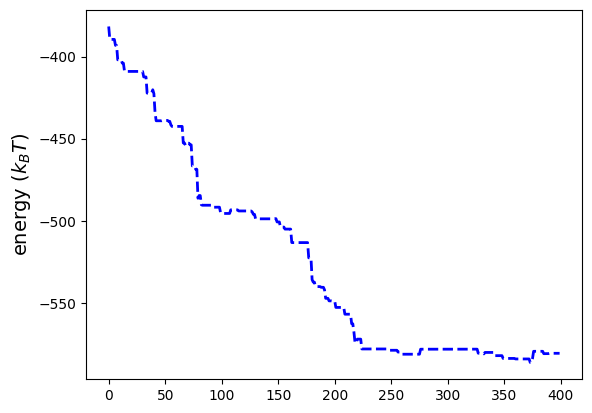

In [7]:
L=np.concatenate([L0[1],L1[1], L2[1],L3[1],L4[1]])
plt.plot(L[100:],linewidth=2,color='b',linestyle='--')
plt.ylabel("energy ($k_BT$)",fontsize=14)
plt.savefig('energy_5000_steps.jpg',dpi=600)

In [199]:
import numpy as np

def generate_random_molecule(init_pos,box_length):
    r = np.random.rand(3)* box_length #generating random point for center of mass
    scale=abs(r)
    #print(scale)
    #init_pos
    return init_pos-scale
def check_overlap(mol_pos, positions):
    threshold  = 0.3
    for position in positions:
        for atom_pos in position:
            # print(np.linalg.norm(atom_pos - mol_pos[0]))

            dx, dy, dz  = atom_pos - mol_pos[0]
            dx, dy, dz = pbc(dx,box_length) , pbc(dy,box_length) , pbc(dz,box_length)
            r1 = np.sqrt(dx*dx+dy*dy+dz*dz)
            dx, dy, dz  = atom_pos - mol_pos[1]
            dx, dy, dz = pbc(dx,box_length) , pbc(dy,box_length) , pbc(dz,box_length)
            r2 = np.sqrt(dx*dx+dy*dy+dz*dz)

            if r1 <threshold or r2 < threshold:
                return True
    return False



def init_system(init_pos,box_length, Npart):

    positions = []
    for i in range(Npart):
        max_iter = 1000
        it = 0
        while it < max_iter:
            r1,r2 = generate_random_molecule(init_pos,box_length)
            print(r1)
            mol_pos = [r1,r2]
            if check_overlap(mol_pos, positions) == True:
                it += 1
            else :
                positions.append(mol_pos)
                print(mol_pos)
                break
        
        if it == max_iter:
            break

    center=np.mean(np.mean(positions,axis=0),axis=0)+np.array([box_length/2,box_length/2,box_length/2])
    return positions-center # translate to middle of box

def pbc(dx, L):
    # pbc checks for periodic image and returns nearest image
    # x is magnitude of distance between two atoms
    # L is box_length
    if dx > L/2:
        dx -= L
    if dx < -L/2:
        dx += L
    
    return dx



In [200]:
positions=init_system(z,2.2,108)





[-0.18105712  0.38207082 -1.50829579]
[array([-0.18105712,  0.38207082, -1.50829579]), array([-0.15727481,  0.51702991, -1.44730032])]
[ 1.0889917   1.09183099 -1.54989238]
[array([ 1.0889917 ,  1.09183099, -1.54989238]), array([ 1.11277401,  1.22679008, -1.48889691])]
[ 0.71790334  1.54203182 -1.51189122]
[array([ 0.71790334,  1.54203182, -1.51189122]), array([ 0.74168565,  1.67699091, -1.45089575])]
[ 1.38629746 -0.20274882 -0.26180397]
[array([ 1.38629746, -0.20274882, -0.26180397]), array([ 1.41007977, -0.06778973, -0.2008085 ])]
[-0.30973378  0.95804705 -0.48418174]
[array([-0.30973378,  0.95804705, -0.48418174]), array([-0.28595147,  1.09300614, -0.42318627])]
[1.279586  0.8186104 0.1045597]
[array([1.279586 , 0.8186104, 0.1045597]), array([1.30336831, 0.95356949, 0.16555517])]
[ 1.44732568  0.03644302 -0.63662099]
[array([ 1.44732568,  0.03644302, -0.63662099]), array([ 1.47110799,  0.17140211, -0.57562552])]
[-0.22303034  0.89991769 -0.52557152]
[ 1.56881628 -0.53052173 -1.1185

In [63]:
from visualize import*

In [190]:
z=np.array([[1.6625878 , 1.5869247 , 0.51880258],[1.68637011, 1.72188379, 0.57979805]])


In [201]:
len(positions)


108

In [136]:
from utility import output_xyz

In [202]:
output_xyz(108,box_length,positions,10,'r.gro')

In [172]:
K=positions-np.mean(np.mean(positions,axis=0),axis=0)+np.array([1.1,1.1,1.1])

In [173]:
np.mean(np.mean(K,axis=0),axis=0)

array([1.1, 1.1, 1.1])

In [171]:
np.mean(np.mean(positions,axis=0),axis=0)

array([2.82507885, 2.73157127, 1.63993232])